### Fase 4: Creación de un Sistema de Recomendación
Diseña y desarrolla un sistema de recomendación basado en los datos recopilados.

**Modelos recomendados:**
- **Modelo colaborativo:** Basado en las preferencias de los usuarios.
- **Modelo basado en contenido:** Considerando géneros, directores y calificaciones.

El sistema debe permitir sugerir películas personalizadas para diferentes tipos de usuarios.

---

## Importamos librerías y configuraciones.

In [73]:
%load_ext autoreload
%autoreload 2

from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
---
## Creacion Sistema de Recomendacion

#### voy a realizar un sistema de recomendacion basado en contenido segun los argumentos de las peliculas.

#### posteriormente si me da tiempo, haré otro por popularidad segun Calificación, Director o Guionista.

In [74]:
with open(f'{DATOS_RUTA_BASE}/movies_shorts_detailed.pkl', 'rb') as f:
     movies_shorts_detailed = pickle.load(f)

In [75]:
df = pd.DataFrame(movies_shorts_detailed, columns=['type', 'name', 'year_month', 'id', 'imdb_rating', 'directors', 'writers', 'argument', 'duration'])

In [76]:
df.sample(5)

,type,name,year_month,id,imdb_rating,directors,writers,argument,duration
706,short,The Sealed Room,1909-9,tt0001032,"6,0/10",[D.W. Griffith],"[Edgar Allan Poe, Frank E. Woods, Honoré de Ba...",A king exacts vengeance upon his faithless mis...,Not Rated
553,short,Topsy-Turvy Quadrille,1899-8,tt0254823,"2,8/10",unknown,unknown,"""Two young ladies and two gentlemen in evening...",0
338,movie,The Rise of Officer 174,1913-5,tt0327848,unknown,[Walter MacNamara],"[King Baggot, Jane Gail]","Police Officer King Baggot 174, is in love wit...",55min
402,short,La défense du drapeau,0-0,tt1741535,"4,9/10",[Alexandre Promio],[Alexandre Promio],,1min
433,short,L'arroseur,1896-None,tt0000035,"5,5/10",[Georges Méliès],[Georges Méliès],This lost film presumably features a person wa...,1min


#### guardamos este primer df aunque los datos estén sucios

In [77]:
df.to_pickle(f"{DATOS_RUTA_TRATADOS}/df_movies_shorts.pkl")

---
---
## Creacion sistema recomendacion por contenido

#### seleccionamos los datos que consideramos útiles

In [78]:
df.sample()

,type,name,year_month,id,imdb_rating,directors,writers,argument,duration
398,short,Mort du porte-drapeau,1897-None,tt1717666,unknown,unknown,unknown,,0


In [79]:
df_util = df[['type', 'name', 'id', 'imdb_rating', 'directors', 'writers', 'argument']]
df_util.sample(2)

,type,name,id,imdb_rating,directors,writers,argument
524,short,La lune à un mètre,tt0000211,"7,4/10",[Georges Méliès],[Georges Méliès],Un astrónomo comienza a sufrir alucinaciones q...
308,movie,David Garrick,tt1171522,unknown,[Hay Plumb],[T.W. Robertson],"An actor poses as a drunkard to repel a girl, ..."


## Limpiamos de Datos

In [80]:
df_util['imdb_rating'] = df_util['imdb_rating'].map(lambda x: x.split('/')[0] if x != 'unknown' else 0)

df_util['directors'] = df_util['directors'].map(lambda x: ', '.join(x) if x != 'unknown' else '')

df_util['writers'] = df_util['writers'].map(lambda x: ', '.join(x) if x != 'unknown' else '')

df_util.sample(5)

,type,name,id,imdb_rating,directors,writers,argument
476,short,Guillaume Tell,tt0283365,"4,3",Alice Guy,Friedrich Schiller,
493,short,Railroad Smashup,tt0000496,"5,7",,,A staged crash between two outmoded locomotive...
392,short,Jealousy,tt0230361,"3,0",,,Dramatic scene in gardens - jealous husband shot.
263,movie,On Her Wedding Night,tt0005828,0,"George D. Baker, William Humphrey",Eugene Mullin,"On the very night of his wedding, John Klendon..."
599,short,Le cake-walk infernal,tt0222874,"6,1",Georges Méliès,Georges Méliès,"Una serie de personajes baila en el Infierno, ..."


#### detectamos los argumentos que están en español y los traducimos al inglés

In [81]:
from langdetect import detect
from googletrans import Translator

def check_lenguage_and_translate(text):

    if text == '':
        return ''

    text_ = text

    lang = detect(text_)

    if lang == 'es':
        translator = Translator(service_urls=['translate.googleapis.com'])
        text_ = translator.translate(text_, dest='en').text

    return text_

In [82]:
df_util['argument'] = df_util['argument'].map(check_lenguage_and_translate)

## juntamos la info importante en una sola columna

In [83]:
df_final = df_util[['type', 'name', 'id', 'imdb_rating']]
df_final['util'] = df_util['directors'] + ' ' + df_util['writers'] + ' ' + df_util['argument']

df_final.sample(5)

,type,name,id,imdb_rating,util
662,short,The Kiss in the Tunnel,tt0257839,"5,3",James Bamforth James Bamforth Similar to The K...
592,short,Les trésors de satan,tt0000413,"5,5",Georges Méliès Georges Méliès In an old castle...
136,movie,Stuart Webbs: Die Toten erwachen,tt0006111,0,Adolf Gärtner Ernst Reicher
357,movie,An Alpine Tragedy,tt3316350,0,After a severe storm in the Alps a party of ...
600,short,Electrocuting an Elephant,tt0231523,"2,7","Edwin S. Porter Carl Goliath, Topsy The execut..."


#### limpiamos la columna

In [84]:
sup_nlp.generar_columna_limpia(df_final, 'util', 'util_cleaned')
df_final.sample(3)

,type,name,id,imdb_rating,util,util_cleaned
27,movie,"Maiskaya noch, ili utoplennitsa",tt0001338,"4,7","Vladimir Krivtsov Yakov Protazanov, Nikolay Go...",vladimir krivtsov yakov protazanov nikolay gogol
261,movie,The Ivory Snuff Box,tt0005558,0,"Maurice Tourneur E. Magnus Ingleton, Frederic ...",maurice tourneur e magnus ingleton frederic ar...
10,movie,Andreas Hofer,tt0000793,"4,1","Rudolf Biebrach, Franz Porten Henny Porten",rudolf biebrach franz porten henny porten


#### eliminamos la columna sucia

In [85]:
df_final.drop(columns=['util'], inplace=True)
df_final.sample()

,type,name,id,imdb_rating,util_cleaned
389,short,Ambulance at the Accident,tt0217248,"4,0",william heise john tierney the victim is lying...


#### (guardamos antes de seguir por si tenemos algun problema)

In [86]:
df_final.to_pickle(f"{DATOS_RUTA_TRATADOS}/df_movies_shorts_to_vectorize.pkl")

---
---
## comenzamos la vectorizacion

In [89]:
df_to_vectorize = df_final.copy()
df_to_vectorize.sample()

,type,name,id,imdb_rating,util_cleaned
363,movie,Filibus,tt0173837,"6,4",mario roncoroni giovanni bertinetti skypirate ...


In [90]:
vectorizer = CountVectorizer(max_features=1500, stop_words='english')

X = vectorizer.fit_transform(df_to_vectorize['util_cleaned']).toarray()

similarity = cosine_similarity(X)
X[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### indicamos la pelicula que le ha gustado al usuario y obtenemos su indice

In [91]:
movie_liked_user = 'Hamlet'

movie_index = sup_reco.get_index_from_register(dataframe=df_to_vectorize, column='name', name=movie_liked_user)

movie_index

23

### obtenemos peliculas similares

In [92]:
similar_movies = list(enumerate(similarity[movie_index]))
similar_movies[:3]

[(0, 0.0), (1, 0.0), (2, 0.0)]

### las ordenamos

In [93]:
ordered_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:21]
ordered_similar_movies[:3]

[(9, 0.9428090415820634), (25, 0.9428090415820634), (44, 0.9428090415820634)]

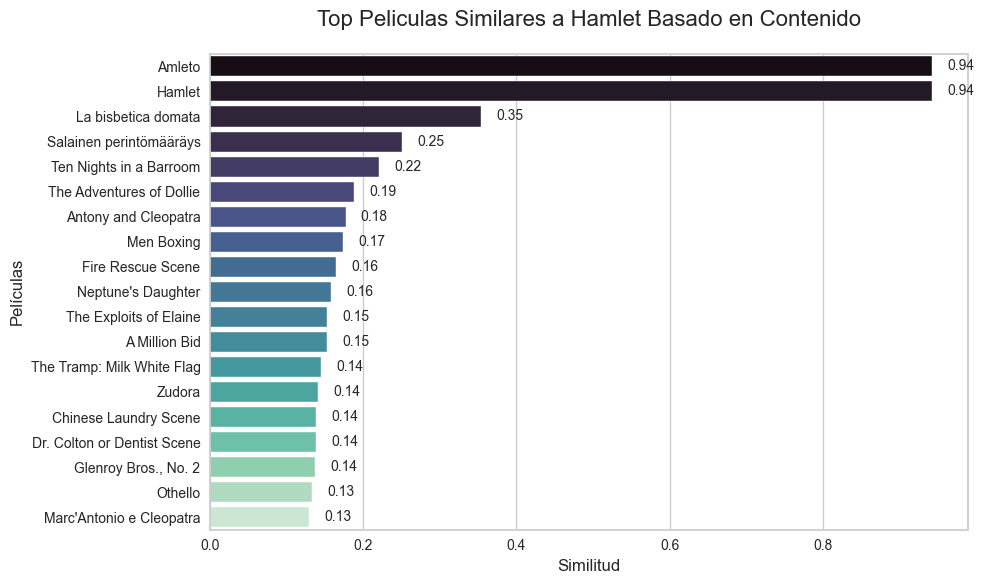

In [95]:
top_similar_games = {}
for i in ordered_similar_movies:
    top_similar_games[sup_reco.get_name_from_index(df_to_vectorize, 'name', i[0])] = i[1]

# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_similar_games.values()), 
    y=list(top_similar_games.keys()), 
    palette="mako"
)

# Añadir etiquetas y título
plt.title(f"Top Peliculas Similares a {movie_liked_user} Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Películas", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_similar_games.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()

## Ahora metemos todo en una funcion y recomendamos para varias películas

In [101]:
def get_similar_movie(dataframe, movie_liked_user_, column_name, ):

    vectorizer = CountVectorizer(max_features=1500, stop_words='english')

    X = vectorizer.fit_transform(dataframe['util_cleaned']).toarray()

    similarity = cosine_similarity(X)    

    movie_liked_user = 'Hamlet'

    movie_index = sup_reco.get_index_from_register(dataframe=dataframe, column=column_name, name=movie_liked_user_)

    similar_movies = list(enumerate(similarity[movie_index]))
    ordered_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:21]

    top_similar_games = {}
    for i in ordered_similar_movies:
        top_similar_games[sup_reco.get_name_from_index(dataframe, column_name, i[0])] = i[1]

    # visualizamos los resultados
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # Crear gráfico de barras
    sns.barplot(
        x=list(top_similar_games.values()), 
        y=list(top_similar_games.keys()), 
        palette="mako"
    )

    # Añadir etiquetas y título
    plt.title(f"Top Peliculas Similares a {movie_liked_user_} Basado en Contenido", fontsize=16, pad=20)
    plt.xlabel("Similitud", fontsize=12)
    plt.ylabel("Películas", fontsize=12)

    # Añadir valores al final de cada barra
    for i, value in enumerate(top_similar_games.values()):
        plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

    plt.tight_layout()

### Volvemos a hacer la misma para ver que la funcion está correcta

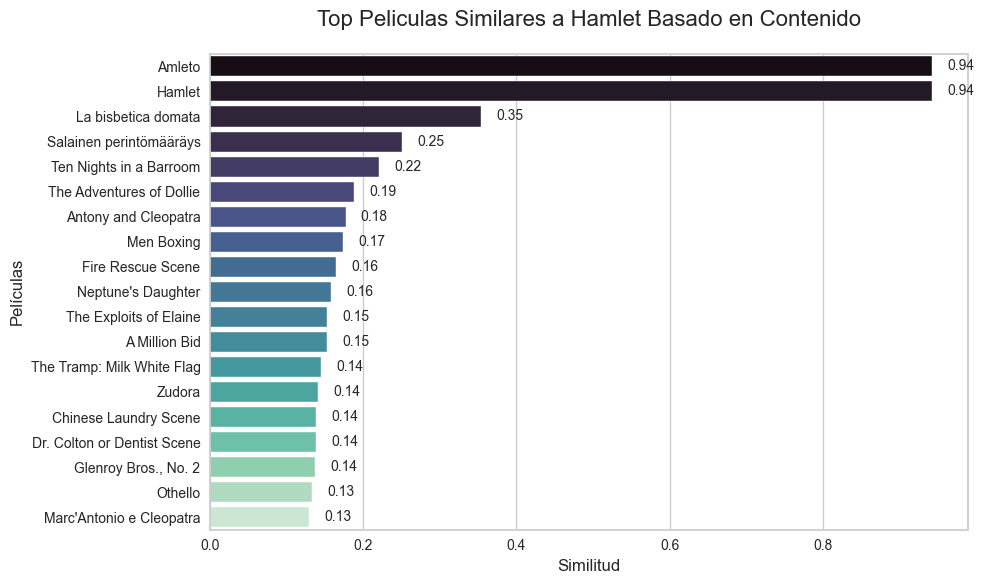

In [102]:
get_similar_movie(df_to_vectorize, 'Hamlet', 'name')

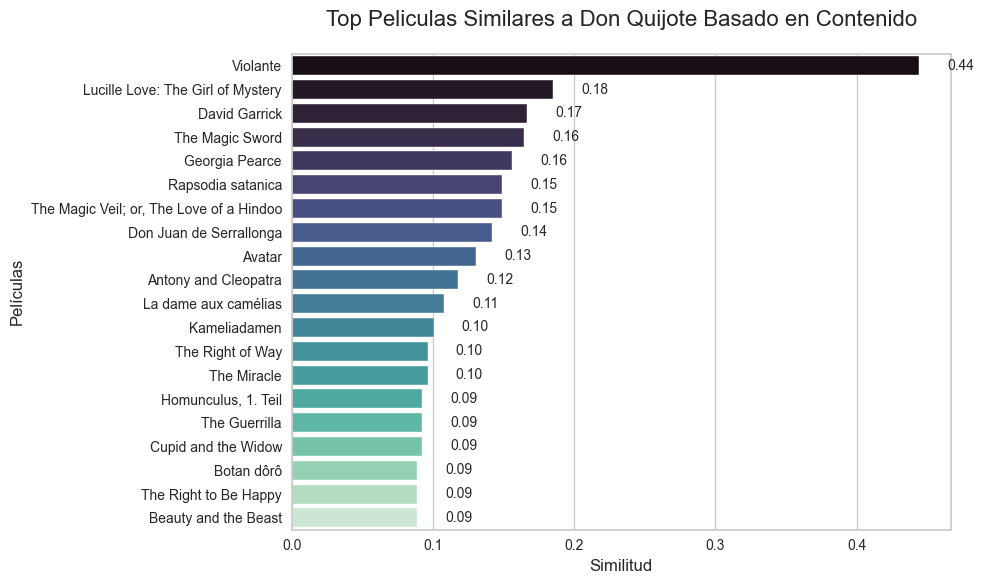

In [103]:
get_similar_movie(df_to_vectorize, 'Don Quijote', 'name')

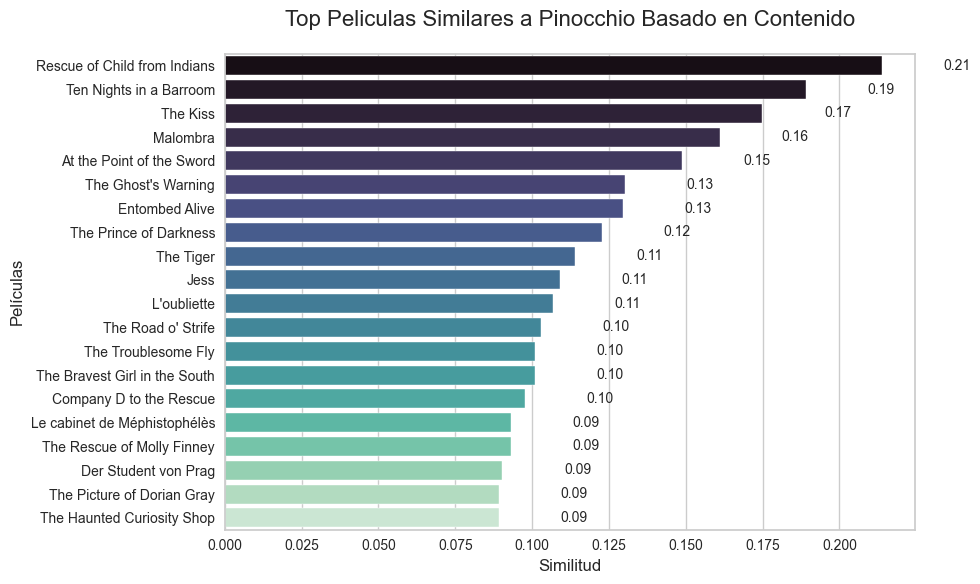

In [104]:
get_similar_movie(df_to_vectorize, 'Pinocchio', 'name')

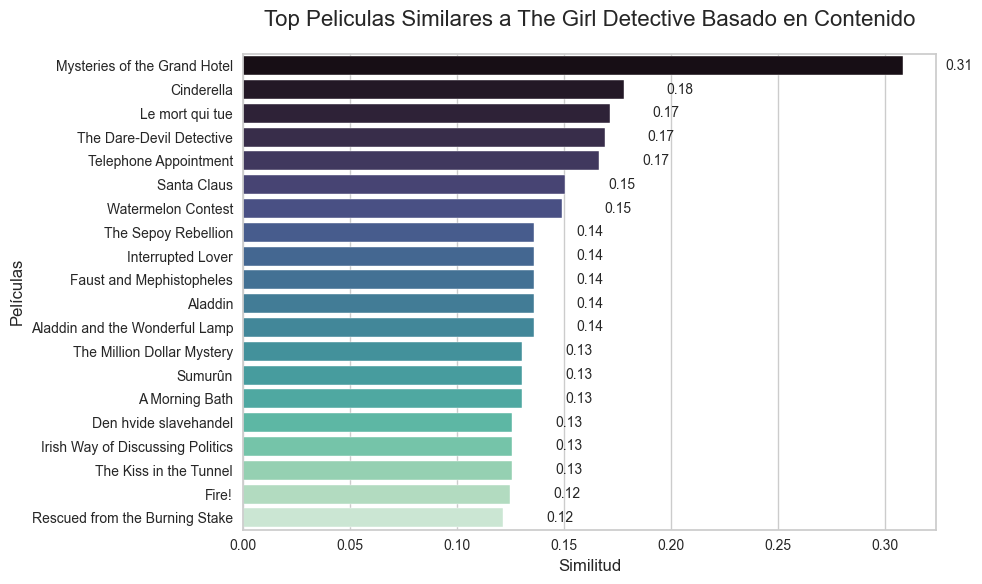

In [105]:
get_similar_movie(df_to_vectorize, 'The Girl Detective', 'name')